# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## Set-1 -> BOW

## 1.1 Loading Data

In [1]:
import pandas as pd
data = pd.read_csv('preprocessed_data.csv')

<h2>Importing Libraries</h2>

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:

y = data['project_is_approved'].values
x = data.drop(['project_is_approved'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [4]:
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow  = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After applying BOW on essay data :")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

After applying BOW on essay data :
(49041, 165745) (49041,)
(24155, 165745) (24155,)
(36052, 165745) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

#### Applying BOW on teacher_prefix

In [5]:
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer.fit(X_train['teacher_prefix'].values)
X_train_teacher_prefix_bow = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_bow  = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_bow = vectorizer.transform(X_test['teacher_prefix'].values)
print("After applying BOW on teacher_prefix :")
print(X_train_teacher_prefix_bow.shape, y_train.shape)
print(X_cv_teacher_prefix_bow.shape, y_cv.shape)
print(X_test_teacher_prefix_bow.shape, y_test.shape)



After applying BOW on teacher_prefix :
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


#### Applying BOW on project_grade_category

In [6]:
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer.fit(X_train['project_grade_category'].values)

X_train_project_grade_category_bow = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_bow  = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_bow = vectorizer.transform(X_test['project_grade_category'].values)
print("After applying BOW on project_grade_category :")
print(X_train_project_grade_category_bow.shape, y_train.shape)
print(X_cv_project_grade_category_bow.shape, y_cv.shape)
print(X_test_project_grade_category_bow.shape, y_test.shape)

After applying BOW on project_grade_category :
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


#### Applying BOW on school_state

In [7]:
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer.fit(X_train['school_state'].values)

X_train_school_state_bow = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_bow  = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_bow = vectorizer.transform(X_test['school_state'].values)

print("After applying BOW on school_state:")
print(X_train_school_state_bow.shape, y_train.shape)
print(X_cv_school_state_bow.shape, y_cv.shape)
print(X_test_school_state_bow.shape, y_test.shape)


After applying BOW on school_state:
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)


#### Applying BOW on clean_categories

In [8]:
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer.fit(X_train['clean_categories'].values)

X_train_clean_categories_bow = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_bow  = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_bow = vectorizer.transform(X_test['clean_categories'].values)

print("After applying BOW on clean_categories :")
print(X_train_clean_categories_bow.shape, y_train.shape)
print(X_cv_clean_categories_bow.shape, y_cv.shape)
print(X_test_clean_categories_bow.shape, y_test.shape)


After applying BOW on clean_categories :
(49041, 44) (49041,)
(24155, 44) (24155,)
(36052, 44) (36052,)


#### Applying BOW on clean_subcategories

In [9]:
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_clean_subcategories_bow = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_bow  = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_bow = vectorizer.transform(X_test['clean_subcategories'].values)

print("After applying BOW on clean_subcategories :")
print(X_train_clean_subcategories_bow.shape, y_train.shape)
print(X_cv_clean_subcategories_bow.shape, y_cv.shape)
print(X_test_clean_subcategories_bow.shape, y_test.shape)


After applying BOW on clean_subcategories :
(49041, 213) (49041,)
(24155, 213) (24155,)
(36052, 213) (36052,)


#### Normalizing Price 

In [10]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()


X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.fit_transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.fit_transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)


print("After normalizing Pice : ")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)


After normalizing Pice : 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Normalizing teacher_number_of_previously_posted_projects

In [11]:
normalizer = Normalizer()

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects_norm = X_cv_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)


print("After normalizing techer_number_of_previously_posted_projects : ")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)

After normalizing techer_number_of_previously_posted_projects : 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Concatnating all Features : 

In [12]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_teacher_prefix_bow, X_train_project_grade_category_bow, X_train_school_state_bow, X_train_clean_categories_bow, X_train_clean_subcategories_bow,X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_teacher_prefix_bow, X_cv_project_grade_category_bow, X_cv_school_state_bow, X_cv_clean_categories_bow, X_cv_clean_subcategories_bow,X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_teacher_prefix_bow, X_test_project_grade_category_bow, X_test_school_state_bow, X_test_clean_categories_bow, X_test_clean_subcategories_bow,X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 166063) (49041,)
(24155, 166063) (24155,)
(36052, 166063) (36052,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h2>Applying Naive Bayes on BOW featurization</h2>

In [13]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 14/14 [00:06<00:00,  2.23it/s]


log of alpha ->  1e-05  is  -11.512925464970229
log of alpha ->  0.0005  is  -7.600902459542082
log of alpha ->  0.0001  is  -9.210340371976182
log of alpha ->  0.005  is  -5.298317366548036
log of alpha ->  0.001  is  -6.907755278982137
log of alpha ->  0.05  is  -2.995732273553991
log of alpha ->  0.01  is  -4.605170185988091
log of alpha ->  0.1  is  -2.3025850929940455
log of alpha ->  0.5  is  -0.6931471805599453
log of alpha ->  1  is  0.0
log of alpha ->  5  is  1.6094379124341003
log of alpha ->  10  is  2.302585092994046
log of alpha ->  50  is  3.912023005428146
log of alpha ->  100  is  4.605170185988092


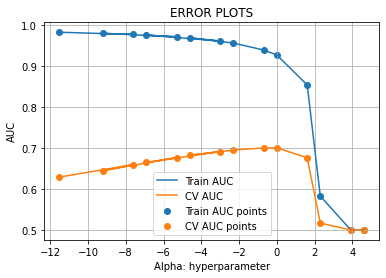

In [14]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1,5,10,50,100]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_tr, y_train)

    y_train_pred = batch_predict(nb, X_tr)    
    y_cv_pred = batch_predict(nb, X_cr)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in alphas:
    b = math.log(a)
    print("log of alpha -> ",a ," is ", b)
    log_alphas.append(b)

plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


-> log is used in order to examine the result otherwise it would be difficult since, points are very close. </br>
-> we can see that after Alpha = 100 the train AUC & CV AUC are converging.</br>
-> At Alpha = 1 we can see the highest CV AUC value. 

# Best Alpha = 1

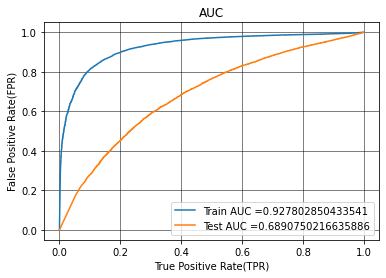

In [15]:
from sklearn.metrics import roc_curve, auc
best_alpha = 1
nb_bow = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])

nb_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_bow, X_tr)    
y_test_pred = batch_predict(nb_bow, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Train AUC = 92.78 % </br>
Test AUC = 68.90 %

In [16]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Test Confusion Matrix for BOW Featurization :


<AxesSubplot:>

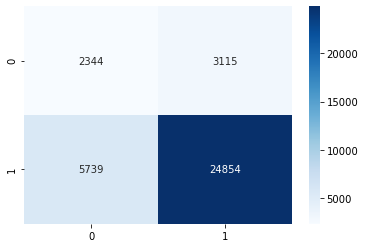

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test Confusion Matrix for BOW Featurization :")
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues')

-> In the following confusion matrix we observe that the True Postive has 24860 which is highest whereas true negatives are only 2318 which are lowest

# Set - 2 (TFIDF)

#### Applying TFIDF on essay :

In [18]:
vectorizer_essay = TfidfVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer_essay.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_essay.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_essay.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_essay.transform(X_test['essay'].values)
print("After allying tfidf on essay : ")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

After allying tfidf on essay : 
(49041, 165745) (49041,)
(24155, 165745) (24155,)
(36052, 165745) (36052,)


#### Applying TFIDF on teacher_prefix 

In [19]:
vectorizer_teacher_prefix = TfidfVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values)

X_train_teacher_prefix_tfidf = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_tfidf = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_tfidf = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

print("After apllying tfidf on teacher_prefix : ")
print(X_train_teacher_prefix_tfidf.shape, y_train.shape)
print(X_cv_teacher_prefix_tfidf.shape, y_cv.shape)
print(X_test_teacher_prefix_tfidf.shape, y_test.shape)

After apllying tfidf on teacher_prefix : 
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


#### Applying TFIDF on project_grade_category

In [20]:
vectorizer_project_grade_category = TfidfVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer_project_grade_category.fit(X_train['project_grade_category'].values)

X_train_project_grade_category_tfidf = vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_tfidf = vectorizer_project_grade_category.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_tfidf = vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

print("After applying tfidf on project_grade_category : ")
print(X_train_project_grade_category_tfidf.shape, y_train.shape)
print(X_cv_project_grade_category_tfidf.shape, y_cv.shape)
print(X_test_project_grade_category_tfidf.shape, y_test.shape)

After applying tfidf on project_grade_category : 
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


#### Applying TFIDF on school_state : 

In [21]:
vectorizer_school_state = TfidfVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer_school_state.fit(X_train['school_state'].values)

X_train_school_state_tfidf = vectorizer_school_state.transform(X_train['school_state'].values)
X_cv_school_state_tfidf = vectorizer_school_state.transform(X_cv['school_state'].values)
X_test_school_state_tfidf = vectorizer_school_state.transform(X_test['school_state'].values)

print("After applying tfidf on school_state : ")
print(X_train_school_state_tfidf.shape, y_train.shape)
print(X_cv_school_state_tfidf.shape, y_cv.shape)
print(X_test_school_state_tfidf.shape, y_test.shape)

After applying tfidf on school_state : 
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)


#### Applying TFIDF on clean_categories : 

In [22]:
vectorizer_clean_categories = TfidfVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer_clean_categories.fit(X_train['clean_categories'].values)

X_train_clean_categories_tfidf = vectorizer_clean_categories.transform(X_train['clean_categories'].values)
X_cv_clean_categories_tfidf = vectorizer_clean_categories.transform(X_cv['clean_categories'].values)
X_test_clean_categories_tfidf = vectorizer_clean_categories.transform(X_test['clean_categories'].values)

print("After applying tfidf on clean_categories : ")
print(X_train_clean_categories_tfidf.shape, y_train.shape)
print(X_cv_clean_categories_tfidf.shape, y_cv.shape)
print(X_test_clean_categories_tfidf.shape, y_test.shape)

After applying tfidf on clean_categories : 
(49041, 44) (49041,)
(24155, 44) (24155,)
(36052, 44) (36052,)


#### Applying TFIDF on clean_subcategories

In [23]:
vectorizer_clean_subcategories = TfidfVectorizer(min_df = 10, ngram_range=(1,4))
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values)

X_train_clean_subcategories_tfidf = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_tfidf = vectorizer_clean_subcategories.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_tfidf = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)

print("After applying tfidf on clean_subcategories : ")
print(X_train_clean_subcategories_tfidf.shape, y_train.shape)
print(X_cv_clean_subcategories_tfidf.shape, y_cv.shape)
print(X_test_clean_subcategories_tfidf.shape, y_test.shape)

After applying tfidf on clean_subcategories : 
(49041, 213) (49041,)
(24155, 213) (24155,)
(36052, 213) (36052,)


#### Normalizing Price

In [24]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()


X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.fit_transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.fit_transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("Normalized Price :")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)


Normalized Price :
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Normalizing techer_number_of_previously_posted_projects

In [25]:
normalizer = Normalizer()

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects_norm = X_cv_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)


print("Normalized teacher_number_of_previously_posted_projects :")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)

Normalized teacher_number_of_previously_posted_projects :
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Concatinating  all the features

In [26]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_teacher_prefix_tfidf, X_train_project_grade_category_tfidf, X_train_school_state_tfidf, X_train_clean_categories_tfidf, X_train_clean_subcategories_tfidf,X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfidf, X_cv_teacher_prefix_tfidf, X_cv_project_grade_category_tfidf, X_cv_school_state_tfidf, X_cv_clean_categories_tfidf, X_cv_clean_subcategories_tfidf,X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_teacher_prefix_tfidf, X_test_project_grade_category_tfidf, X_test_school_state_tfidf, X_test_clean_categories_tfidf, X_test_clean_subcategories_tfidf,X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 166063) (49041,)
(24155, 166063) (24155,)
(36052, 166063) (36052,)


<h2>Applying Naive Bayes on TFIDF featurization</h2>

In [27]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 14/14 [00:06<00:00,  2.31it/s]


log of alpha ->  1e-05  is  -11.512925464970229
log of alpha ->  0.0005  is  -7.600902459542082
log of alpha ->  0.0001  is  -9.210340371976182
log of alpha ->  0.005  is  -5.298317366548036
log of alpha ->  0.001  is  -6.907755278982137
log of alpha ->  0.05  is  -2.995732273553991
log of alpha ->  0.01  is  -4.605170185988091
log of alpha ->  0.1  is  -2.3025850929940455
log of alpha ->  0.5  is  -0.6931471805599453
log of alpha ->  1  is  0.0
log of alpha ->  5  is  1.6094379124341003
log of alpha ->  10  is  2.302585092994046
log of alpha ->  50  is  3.912023005428146
log of alpha ->  100  is  4.605170185988092


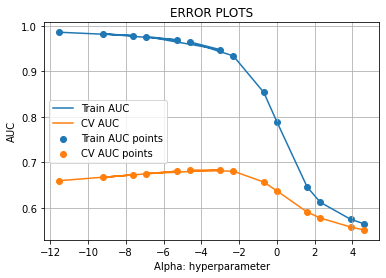

In [28]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1,5,10,50,100]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_tr, y_train)

    y_train_pred = batch_predict(nb, X_tr)    
    y_cv_pred = batch_predict(nb, X_cr)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in alphas:
    b = math.log(a)
    print("log of alpha -> ",a ," is ", b)
    log_alphas.append(b)

plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


-> log is used in order to examine the result otherwise it would be difficult since, points are very close. </br>
-> we can see that after Alpha = 5 the train AUC & CV AUC are converging.</br>
-> At Alpha = 0.1 we can see the highest CV AUC value. 

# Best Alpha = 0.1

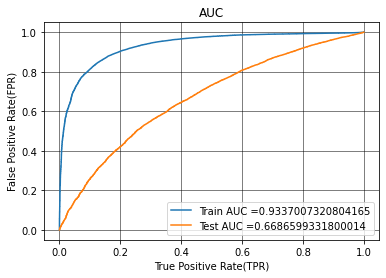

In [29]:
from sklearn.metrics import roc_curve, auc
best_alpha = 0.1
nb_bow = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])

nb_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_bow, X_tr)    
y_test_pred = batch_predict(nb_bow, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Train AUC = 93.37 % </br>
Test AUC = 66.86 %

In [30]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Test Confusion Matrix for Set 2 (TFIDF):


<AxesSubplot:>

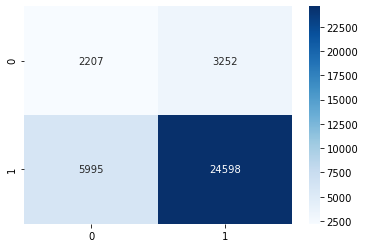

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test Confusion Matrix for Set 2 (TFIDF):")
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues')



-> In the following confusion matrix we observe that the True Postive has 24598 which is highest whereas true negatives are only 2207 which is lowest

# Top 20 Features from set 2

In [32]:
nb_tfidf = MultinomialNB(alpha = 0.1,class_prior=[0.5,0.5])

nb_tfidf.fit(X_tr, y_train)

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5])

In [33]:
tfidf_features = []

for cnt in vectorizer_essay.get_feature_names() :
    tfidf_features.append(cnt)

for cnt1 in vectorizer_school_state.get_feature_names() :
    tfidf_features.append(cnt1)

for cnt2 in vectorizer_clean_subcategories.get_feature_names() :
    tfidf_features.append(cnt2)

for cnt3 in vectorizer_clean_categories.get_feature_names() :
    tfidf_features.append(cnt3)

for cnt4 in vectorizer_project_grade_category.get_feature_names() :
    tfidf_features.append(cnt4)

for ct5 in vectorizer_teacher_prefix.get_feature_names():
    tfidf_features.append(ct5)

tfidf_features.append('price')
tfidf_features.append('teacher_number_of_previously_posted_projects')

len(tfidf_features)

166063

In [34]:
# Top 20 postivite class Features 
pos_class_prob_sorted = nb_tfidf.feature_log_prob_[1, :].argsort()[::-1]
for i in pos_class_prob_sorted[:20]:
    print(tfidf_features[i])

al
dc
ar
ca
charactereducation literacy
charactereducation visualarts
warmth care_hunger
co
ia
history_civics math_science
health_sports appliedlearning
appliedsciences parentinvolvement
charactereducation other
ct
ak
college_careerprep communityservice
warmth care_hunger
civics_government specialneeds
students
appliedsciences health_lifescience


In [35]:
# Top 20 negative class Features 
neg_class_prob_sorted = nb_tfidf.feature_log_prob_[0, :].argsort()[::-1]
for i in neg_class_prob_sorted[0:20]:
    print(tfidf_features[i])

al
dc
ar
ca
charactereducation visualarts
charactereducation literacy
co
history_civics math_science
warmth care_hunger
ia
ct
appliedsciences parentinvolvement
ak
health_sports appliedlearning
college_careerprep communityservice
warmth care_hunger
charactereducation other
appliedsciences
appliedsciences health_lifescience
civics_government specialneeds


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [37]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", " Test AUC"]

x.add_row(["BOW", "Naive Bayes", 1, 68.90])
x.add_row(["TFIDF", "Naive Bayes", 0.1, 66.86 ])

print(x)

+------------+-------------+-----------------------+-----------+
| Vectorizer |    Model    | Alpha:Hyper Parameter |  Test AUC |
+------------+-------------+-----------------------+-----------+
|    BOW     | Naive Bayes |           1           |    68.9   |
|   TFIDF    | Naive Bayes |          0.1          |   66.86   |
+------------+-------------+-----------------------+-----------+
